## Customer Personality Analysis

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. 

Importing required libraries

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime 

Importing Data file

In [2]:
df = pd.read_csv('customer.csv')
pd.options.display.max_columns = None
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Only income feature have some null values. Let's check them out and redund them

In [6]:
df.Income[df.Income.isnull()]

10     NaN
27     NaN
43     NaN
48     NaN
58     NaN
71     NaN
90     NaN
91     NaN
92     NaN
128    NaN
133    NaN
312    NaN
319    NaN
1379   NaN
1382   NaN
1383   NaN
1386   NaN
2059   NaN
2061   NaN
2078   NaN
2079   NaN
2081   NaN
2084   NaN
2228   NaN
Name: Income, dtype: float64

In [7]:
len(df.Income[df.Income.isnull()])

24

Only 24 rows have null values. We can remove these rows as they are very less in number to our dataset.

In [8]:
df1 = df.dropna(axis=0)
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [9]:
df1.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

([<matplotlib.patches.Wedge at 0x5bd97250>,
 [Text(-0.012702287023631176, 1.1199279672837756, 'Graduation'),
  Text(-0.8609210540930335, -0.7319255007303272, 'PhD'),
  Text(0.37608166898481954, -1.086767030349004, 'Master'),
  Text(1.0874096097115098, -0.5074843255777091, '2n Cycle'),
  Text(1.196485326380795, -0.0917761611500637, 'Basic')],
 [Text(-0.007031623173795829, 0.6199601247463757, '50%'),
  Text(-0.4799825345828416, -0.4080646596992089, '22%'),
  Text(0.2125678998609849, -0.6142596258494369, '16%'),
  Text(0.634322272331714, -0.2960325232536636, '9%'),
  Text(0.6979497737221303, -0.053536094004203824, '2%')])

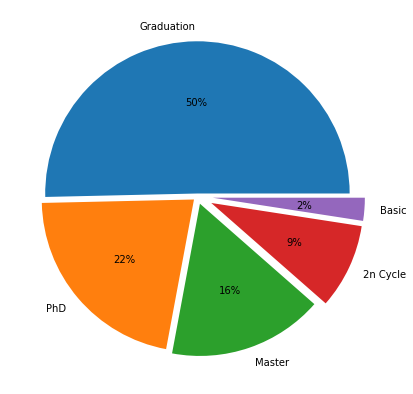

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.pie(x=df1.Education.value_counts(),labels=['Graduation','PhD','Master','2n Cycle','Basic'],autopct='%1.0f%%',explode=(0.02,0.03,0.05,0.1,0.1))

Customers with basic degree are very less<br>
Most customers have atleast a graduation degree

In [11]:
df1.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

**YOLO** and **Absurd** are gibberish values. So, it's better to remove these rows as they are only 4 in total<br>
**Alone** maybe converted into **Single** marital status

### Feature Engineering

In [12]:
i = df1[(df1.Marital_Status=='Absurd')].index
i

Int64Index([2093, 2134], dtype='int64')

In [13]:
df1.drop(index=i,inplace=True)
df1

c:\users\aman asati\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [14]:
j = df1[(df1.Marital_Status=='YOLO')].index
j

Int64Index([2177, 2202], dtype='int64')

In [15]:
df1.drop(index=j,inplace=True)
df1.head()

c:\users\aman asati\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [16]:
df1['Dt_Customer']=df1['Dt_Customer'].replace(['Alone'],'Single')
df1.head()

c:\users\aman asati\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [17]:
len(df1[df1.Marital_Status=='Alone'])

3

In [18]:
df1.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Name: Marital_Status, dtype: int64

In [19]:
df1 = df1.replace(['Alone'],'Single')

([<matplotlib.patches.Wedge at 0x5bf2a970>,
 [Text(-0.014315785465170672, 1.119908504426373, 'Married'),
  Text(-0.8599878291424933, -0.7330217825731934, 'Together'),
  Text(0.3751927529342134, -1.087074237642327, 'Single'),
  Text(1.059833334894817, -0.49563424240636444, 'Divorced'),
  Text(1.1964726073758085, -0.09194182834452827, 'Widow')],
 [Text(-0.00792480981107662, 0.6199493506645992, '50%'),
  Text(-0.47946224102634577, -0.4086758610806299, '22%'),
  Text(0.21206546904977275, -0.6144332647543587, '16%'),
  Text(0.6069131063072883, -0.28382473710449924, '9%'),
  Text(0.6979423543025549, -0.053632733200974815, '2%')])

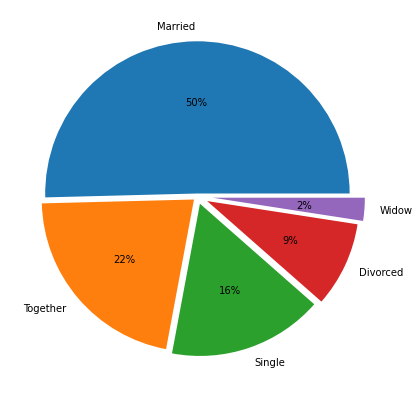

In [20]:
fig = plt.figure(figsize =(10, 7))
plt.pie(x=df1.Education.value_counts(),labels=['Married','Together','Single','Divorced','Widow'],autopct='%1.0f%%',explode=(0.02,0.03,0.05,0.07,0.1))

Check the customer's Age

In [21]:
df1['Year_Purchased'] = list(df1['Dt_Customer'].apply(lambda x: int(x[-4:])))

In [22]:
df1.Year_Purchased.head()

0    2012
1    2014
2    2013
3    2014
4    2014
Name: Year_Purchased, dtype: int64

In [23]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Purchased
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014


In [24]:
df1['Age'] =  df1['Year_Purchased'] - df1['Year_Birth']

In [25]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Purchased,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,55
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,60
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,48
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,30
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,33


In [26]:
df2 = df1.drop(labels=['ID','Year_Birth','Year_Purchased','Dt_Customer'],axis=1)
df2.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33


Now, Let's Check for outliers

In [27]:
df2.Income.describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Understand income distribution on graph

### Outlier Detection and Removal

<AxesSubplot:xlabel='Income', ylabel='Count'>

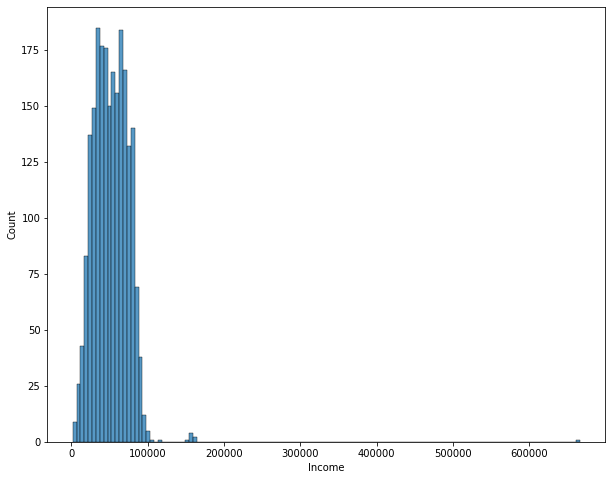

In [28]:
plt.subplots(1,1,figsize=(10,8))
sns.histplot(df2.Income)

In [29]:
df2[df2.Income<2000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
1245,Graduation,Divorced,1730.0,0,0,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,43


In [30]:
df2[df2.Income<5000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
21,Graduation,Married,2447.0,1,0,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0,34
981,Graduation,Divorced,4861.0,0,0,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,49
1245,Graduation,Divorced,1730.0,0,0,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,3,11,0,43
1524,Graduation,Single,3502.0,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0,40
1846,PhD,Married,4023.0,1,1,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0,51
1975,Graduation,Married,4428.0,0,1,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0,44


In [31]:
df2[df2.Income>200000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,36


These above things are outliers, so better to take them out cause it will only reduce the efficiency of our model

In [32]:
i=df2[df2.Income<5000].index

In [33]:
df2.drop(i,inplace=True)

In [34]:
j= df2[df2.Income>200000].index

In [35]:
df2.drop(j,inplace=True)

In [36]:
len(df2[(df2.Income<5000)])

0

In [37]:
len(df2[df2.Income>200000])

0

c:\users\aman asati\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

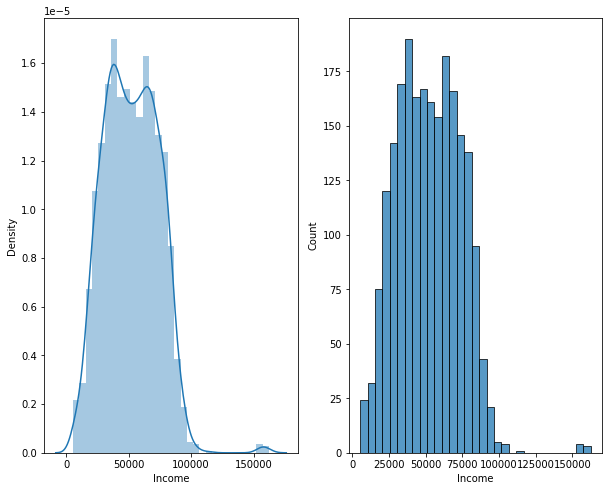

In [38]:
plt.subplots(1,2,figsize=(10,8))
sns.histplot(df2.Income)
plt.subplot(1,2,1)
sns.distplot(df2.Income)

Okay!! This data looks perfect for modelling. Seems likes normalized one, though we haven't done that😂😛

### Data Modelling

In [39]:
df3 = df2.copy()

In [40]:
df3.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33


In [41]:
dummies_edu = pd.get_dummies(df3.Education)

In [42]:
dummies_edu.head()

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [43]:
dummies_marital = pd.get_dummies(df3.Marital_Status)

In [44]:
dummies_marital.head()

,Divorced,Married,Single,Together,Widow
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0


In [45]:
df4 = pd.concat([df3, dummies_edu, dummies_marital],axis='columns')

In [46]:
df4.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,55,0,0,1,0,0,0,0,1,0,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,60,0,0,1,0,0,0,0,1,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,48,0,0,1,0,0,0,0,0,1,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,30,0,0,1,0,0,0,0,0,1,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,33,0,0,0,0,1,0,1,0,0,0


In [47]:
df4.drop(['Education','Marital_Status'],axis='columns',inplace=True)

In [48]:
df4.shape

(2205, 35)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x = df4.drop(['Response'],axis=1)

In [51]:
x.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,55,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,60,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,48,0,0,1,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,30,0,0,1,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,33,0,0,0,0,1,0,1,0,0,0


In [52]:
y = df4.Response

In [53]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

##### Find best model using GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

def find_best_model(X,y):
    algos={
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.270781,{'normalize': True}
1,lasso,0.105610,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,-0.312923,"{'criterion': 'mse', 'splitter': 'random'}"


😱😱😭😭😭😭<br>
Even Best score is in negative<br>
Don't Judge!!🤣😂 Just Tried what happens to a binary classification data when we apply linear regression on it.

Try LogisticRegression as this is a classification analysis

In [56]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

c:\users\aman asati\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8639455782312925

Trying some another classification algorithms

1.Support Vector Machine

In [57]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8571428571428571

2.Naive Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7120181405895691